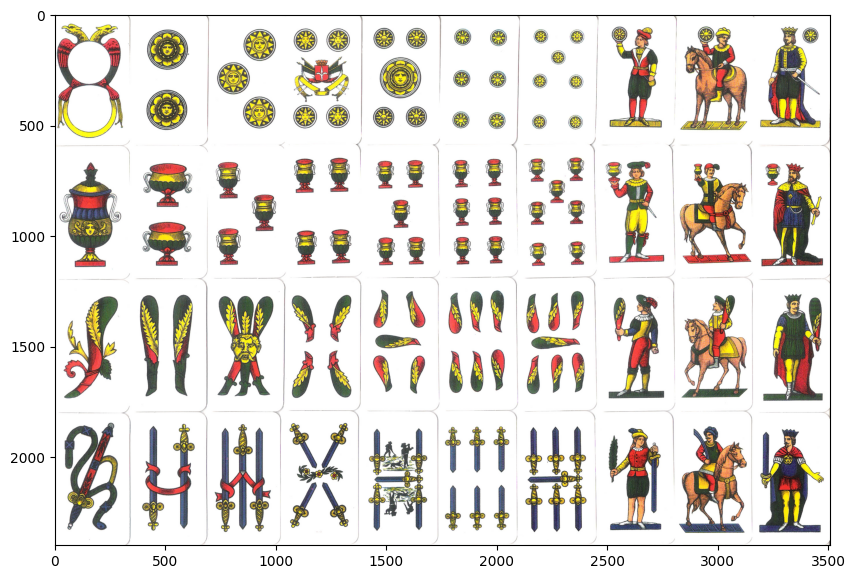

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

all_cards = cv2.imread('Images/Carte_napoletane_al_completo.jpg')

def print_image(image):
    plt.figure(figsize=[10,8])
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    
print_image(all_cards)

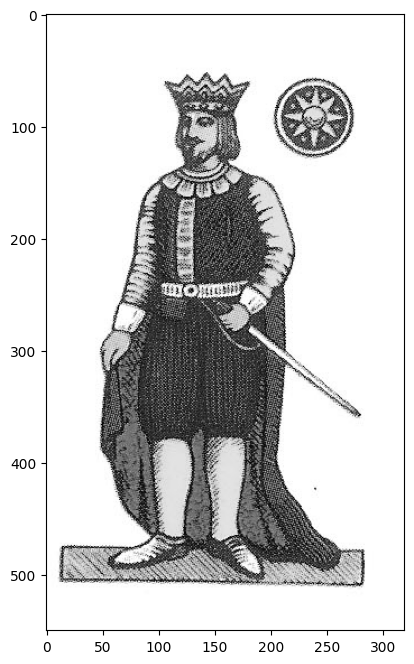

In [2]:
image = all_cards[0:550,3180:3500]
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print_image(gray_image)


In [3]:
def preprocess_image(img):
    #img = cv2.imread(image_path)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    # Use adaptive thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Optionally, perform morphological operations to further clean up the image
    kernel = np.ones((3, 3), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return img, thresh, contours

In [4]:
def draw_contours(original_image, contours):
    # Create a copy of the original image to draw on
    image_with_contours = original_image.copy()

    # Draw contours on the image
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # You can adjust the color and thickness

    # Display the image with contours
    cv2.imshow('Image with Contours', image_with_contours)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
original_image, preprocessed_image, contours = preprocess_image(image)
draw_contours(original_image, contours)